## データの取り込みと確認

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white") #グラフのプロパティを設定
plt.rcParams["figure.figsize"] = [10, 5] #グラフの大きさを設定
pd.set_option('display.max_columns', 150) #表示する列数の上限を150に設定
pd.set_option('display.max_rows', 50) #表示する行数の上限を50に設定

In [3]:
# データの取り込み
df_master = pd.read_csv('news_text_analysis_data.csv')
df = df_master.copy()
df

,category,text
0,movie-enter,【DVDエンター！】誘拐犯に育てられた女が目にした真実は、孤独か幸福か2005年11月から翌...
1,movie-enter,藤原竜也、中学生とともにロケット打ち上げに成功「アンテナを張りながら生活をしていけばいい」2...
2,movie-enter,『戦火の馬』ロイヤル・プレミアにウィリアム王子＆キャサリン妃が出席3月2日より全国ロードショ...
3,movie-enter,香里奈、女子高生100人のガチンコ質問に回答「ラーメンも食べる」女優の香里奈が18日、都内で...
4,movie-enter,ユージの前に立ちはだかったJOY「僕はAKBの高橋みなみを守る」5日、東京・千代田区の内幸町...
...,...,...
7371,smax,好きな戦士を作ってドラゴンボールの世界で天下一武道会優勝だ！「挑戦！天下一武道会」【Andr...
7372,smax,NTTドコモ、GALAXY SIII SC-06DとF-09D ANTEPRIMAの発売日を...
7373,smax,NTTドコモ、Android向け「docomo Wi-Fiかんたん接続アプリ」をバージョンア...
7374,smax,NTTドコモ、PRADA Phone by LG L-02Dのデコメ絵文字popが正常に表示...


In [4]:
# データの欠損と型の確認(info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376 entries, 0 to 7375
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  7376 non-null   object
 1   text      7376 non-null   object
dtypes: object(2)
memory usage: 115.4+ KB


<Axes: xlabel='count', ylabel='category'>

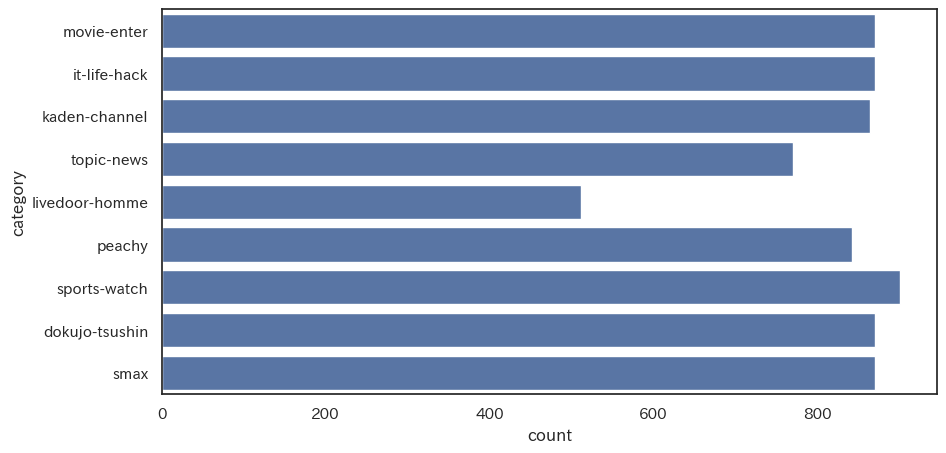

In [5]:
# categoryの分布確認
sns.countplot(y="category",data=df)

count     7376.000000
mean      1225.116594
std        742.426126
min         34.000000
25%        711.000000
50%       1034.000000
75%       1564.250000
max      11682.000000
Name: text, dtype: float64

<Axes: xlabel='text', ylabel='Count'>

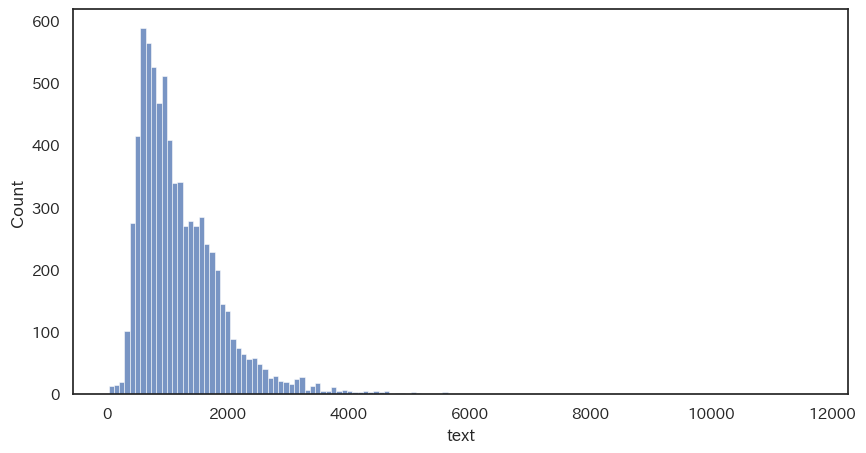

In [5]:
# テキストデータの文字数の分布(ヒストグラムを作ってみましょう)
text_length = df["text"].apply(lambda x:len(x))
display(text_length.describe())
sns.histplot(text_length)

In [6]:
df[text_length == 34]

,category,text
3571,livedoor-homme,アウディA1 スポーツバックが登場Audi A1 Sportback


## 課題1. 各文章データを単語の出現数のデータに変換しましょう

1. MeCabまたはJanomeを使って文章から名詞だけを抽出したリストに変換する  
2. pandasのexplodeメソッドを使って、作成した名詞のリストを展開(UNNEST)する

In [7]:
# 文章から単語だけ抜き出す関数を作成
# import MeCab
# wakati = MeCab.Tagger()#インスタンスの作成
# words_info = wakati.parse("私は早く走りたい").splitlines()[:-1]
# print(words_info)
# word_info = words_info[0]
# print(word_info)
# word = word_info.split("\t")[0]
# part_of_speech = word_info.split("\t")[4].split("-")[0]
# print(word,part_of_speech)


import MeCab
tagger = MeCab.Tagger()
print(tagger.parse("私は早く走りたい"))



# 分かち書き関数のテスト用サンプル(環境によって挙動が変わる可能性があるので、エラーが出る場合は修正が必要になります)
import MeCab
# wakati = MeCab.Tagger() # インスタンス作成
# words_info = wakati.parse("私は早く走りたい").splitlines()[:-1] # 各単語の情報を取得(最後の要素だけ必要ないので[:-1]で除外)
# print(words_info)
# word_info = words_info[0] # 最初の単語(今回は"私")の情報を抜き出す
# print(word_info)
# word = word_info.split("\t")[0] # splitメソッドで必要な情報だけ抜き出す
# part_of_speech = word_info.split("\t")[4].split("-")[0]
# print(word, part_of_speech) # 単語と品詞がそれぞれ抜き出せていればOK

ModuleNotFoundError: No module named 'MeCab'

In [8]:
# 文章から名詞だけを抽出し、UNNESTする
df_noun = df_master.copy()
df_noun["noun"] = df_noun["text"].apply(extract_nouns_from_text)
f_noun = df_mnoun.explode("noun")
df_noun[["text","category","noun"]]



NameError: name 'extract_nouns_from_text' is not defined

## 課題2. 全記事で出現頻度の高い単語は何か？

課題1で作成したデータフレームを集計して、出現頻度の高い単語を抽出する

In [1]:
#groupbyメソッドを使って各単語の出現数を集計
df_noun.groupby("noun", as_index=False).count()[["noun", "text"]].sort_values("text", ascending=False).head(30)                                             

NameError: name 'df_noun' is not defined

In [2]:
# 出現率の高い単語を集計
all_text_count = df_noun["text"].nunique()
word_freq_rate = df_noun.groupby("noun", as_index=False).nunique("text")[["noun", "text"]]
word_freq_rate["text"] = word_freq_rate["text"] / all_text_count
word_freq_rate.columns = ["noun", "freq_rate"]
word_freq_rate.sort_values("freq_rate", ascending=False).head(10)

NameError: name 'df_noun' is not defined

In [3]:
# 出現数と出現率を同じデータにまとめる
all_category_result = pd.merge(word_cnt, word_freq_rate, on="noun", how="outer")
display(all_category_result.sort_values("cnt", ascending=False).head(10))
display(all_category_result.sort_values("freq_rate", ascending=False).head(10))

NameError: name 'pd' is not defined

## 課題3. カテゴリー別で見た時に、出現頻度の高い単語はそれぞれ何か？

カテゴリー別に課題2で行った集計を行い、出現頻度の高い単語を抽出する

In [11]:
# movie-enter
except_word_list2 = ["映画", "作品", "月日", "本作", "MOVIE", "ENTER"]
df_result = text_summary_making("movie-enter")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [12]:
# it-life-hack
except_word_list2 = ["通", "元", "jp"]
df_result = text_summary_making("it-life-hack")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [13]:
# kaden-channel
except_word_list2 = []
df_result = text_summary_making("kaden-channel")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [14]:
# topic-news
except_word_list2 = ["同", "一方"]
df_result = text_summary_making("topic-news")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [15]:
# livedoor-homme
except_word_list2 = ["万", "以上", "livedoor", "元"]
df_result = text_summary_making("livedoor-homme")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [16]:
# peachy
except_word_list2 = ["方", "月日"]
df_result = text_summary_making("peachy")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [17]:
# sports-watch
except_word_list2 = ["Sports", "Watch"]
df_result = text_summary_making("sports-watch")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [18]:
# dokujo-tsushin
except_word_list2 = ["ところ", "とき", "方", "話", "そう"]
df_result = text_summary_making("dokujo-tsushin")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

In [19]:
# smax
except_word_list2 = ["MAX", "対応", "更新", "マックス", "エス", "on", "名", "smaxjp"]
df_result = text_summary_making("smax")
df_result = df_result.query('noun not in @except_word_list2')
display(df_result.sort_values("cnt", ascending=False).head(10))
display(df_result.sort_values("freq_rate", ascending=False).head(10))

## 分析の結論

##### movie-enter
「公開、日本、登場、賞」などの日本公開や受賞映画に関するワード

it-life-hack
「PC、iPhone、アプリ、写真、機能」などのガジェットに関するワード
「製品、機能、口コミ、販売」などの製品の機能や口コミ、販売情報系のワード

kaden-channel
「ビデオ、テレビ」などの家電ワード
「売れ筋、発売、チェック、円」などの商品情報紹介ワード

topic-news
「ネット、韓国、番組、放送、批判、意見、コメント」などネット情報系のワード

livedoor-homme
「転職、仕事、年収、会社、ゴルフ」などビジネスマンが気になる系のワード

peachy
「女性、肌、人気、応募、プレゼント」など女性が気になるワード

sports-watch
「試合、選手、テレビ、放送」などスポーツの試合、選手情報系のワード
サッカーが一番多く、野球が二番目

dokujo-tsushin
「歳、女性、結婚」など特定の年齢層の婚活女性が気になる系のワード

smax
「Android、開発、アプリ、搭載」などITソフトウェア系のワード